gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

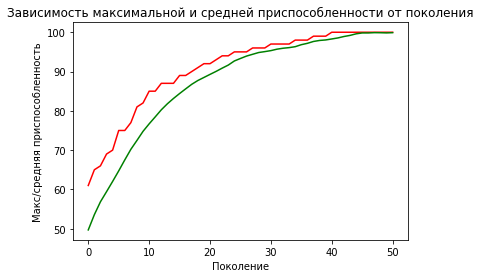

In [17]:
from deap import base, algorithms
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import numpy as np

# константы задачи
ONE_MAX_LENGTH = 100    # длина подлежащей оптимизации битовой строки

# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def oneMaxFitness(individual):
    return sum(individual), # кортеж

toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

toolbox.register("evaluate", oneMaxFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

gen	nevals	max	avg  
0  	200   	66 	50.02
1  	188   	66 	54.365
2  	184   	68 	57.185
3  	189   	69 	60.345
4  	185   	69 	62.365
5  	181   	70 	64.405
6  	178   	72 	66.055
7  	181   	75 	67.41 
8  	189   	74 	68.76 
9  	183   	75 	70.095
10 	183   	76 	71.285
11 	183   	77 	72.405
12 	181   	78 	73.3  
13 	181   	81 	73.87 
14 	180   	81 	74.79 
15 	177   	80 	75.65 
16 	180   	80 	76.865
17 	184   	82 	77.9  
18 	178   	82 	78.8  
19 	178   	85 	79.52 
20 	175   	86 	80.275
21 	191   	85 	80.735
22 	181   	87 	81.43 
23 	179   	88 	82.215
24 	172   	88 	83.425
25 	181   	89 	84.205
26 	185   	88 	84.795
27 	178   	88 	85.39 
28 	187   	88 	85.815
29 	180   	89 	86.23 
30 	186   	91 	86.61 
31 	182   	91 	87.15 
32 	179   	91 	87.595
33 	184   	91 	88.17 
34 	181   	91 	88.66 
35 	183   	92 	88.905
36 	179   	93 	89.19 
37 	183   	93 	89.46 
38 	181   	93 	89.835
39 	182   	94 	90.08 
40 	185   	94 	90.445
41 	181   	95 	90.755
42 	191   	94 	91.09 
43 	179   	94 	91.35 
44 	179   	9

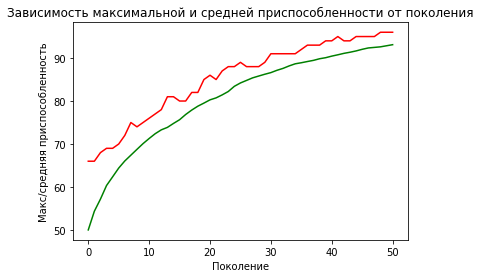

In [22]:
from deap import base, algorithms
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import numpy as np

# константы задачи
ONE_MAX_LENGTH = 100    # длина подлежащей оптимизации битовой строки

# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.1       # вероятность скрещивания
P_MUTATION = 0.9        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений

RANDOM_SEED = 43
random.seed(RANDOM_SEED)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def oneMaxFitness(individual):
    return sum(individual), # кортеж

toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

toolbox.register("evaluate", oneMaxFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()